In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eigh
import sklearn.preprocessing as prep
from sklearn.decomposition import PCA
import seaborn as sns
import statsmodels.api as sm

In [2]:
#Setting up working directory
os.getcwd()
os.chdir('/Users/amishvyas/UTD/FALL/BUAN6383/Homework/HW-1')

In [3]:
# Reading dataset
df = pd.read_csv('boxOffice.csv')
df

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3
0,19167085,0,0,0,28.0,19.83,0,0,1,0,0,7860.500000,10,144,0.49
1,63106589,0,1,0,150.0,32.69,1,0,0,1,0,5737.000000,59,468,0.79
2,5401605,0,0,0,37.4,15.69,0,0,1,0,0,850.000000,24,198,0.36
3,67528882,0,0,1,200.0,23.62,1,1,0,0,0,15326.000000,93,1778,0.76
4,26223128,0,1,0,150.0,19.02,0,0,0,1,0,4574.250000,30,1109,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,59321095,0,1,0,175.0,34.86,0,0,0,1,0,9085.500000,68,647,0.70
58,5329240,0,0,1,22.0,4.25,0,1,0,0,0,3186.000000,94,39,0.62
59,23004765,0,0,1,16.7,5.96,0,0,0,0,1,17584.000000,58,122,0.53
60,70950500,0,0,1,85.0,16.62,1,1,0,0,0,10609.666670,594,849,0.71


In [4]:
#Exploring the Dataset and stats of the variables
df.head()
df.describe()
df.info()
df.isna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   box       62 non-null     int64  
 1   G         62 non-null     int64  
 2   PG        62 non-null     int64  
 3   PG13      62 non-null     int64  
 4   budget    62 non-null     float64
 5   starpowr  62 non-null     float64
 6   sequel    62 non-null     int64  
 7   action    62 non-null     int64  
 8   comedy    62 non-null     int64  
 9   animated  62 non-null     int64  
 10  horror    62 non-null     int64  
 11  addict    62 non-null     float64
 12  cmngsoon  62 non-null     int64  
 13  fandango  62 non-null     int64  
 14  cntwait3  62 non-null     float64
dtypes: float64(4), int64(11)
memory usage: 7.4 KB


<bound method DataFrame.isna of          box  G  PG  PG13  budget  starpowr  sequel  action  comedy  animated  \
0   19167085  0   0     0    28.0     19.83       0       0       1         0   
1   63106589  0   1     0   150.0     32.69       1       0       0         1   
2    5401605  0   0     0    37.4     15.69       0       0       1         0   
3   67528882  0   0     1   200.0     23.62       1       1       0         0   
4   26223128  0   1     0   150.0     19.02       0       0       0         1   
..       ... ..  ..   ...     ...       ...     ...     ...     ...       ...   
57  59321095  0   1     0   175.0     34.86       0       0       0         1   
58   5329240  0   0     1    22.0      4.25       0       1       0         0   
59  23004765  0   0     1    16.7      5.96       0       0       0         0   
60  70950500  0   0     1    85.0     16.62       1       1       0         0   
61   5722039  0   0     0    10.0     16.09       0       0       1         0

In [5]:
#Setting styles for the plot
plt.style.use('fivethirtyeight')

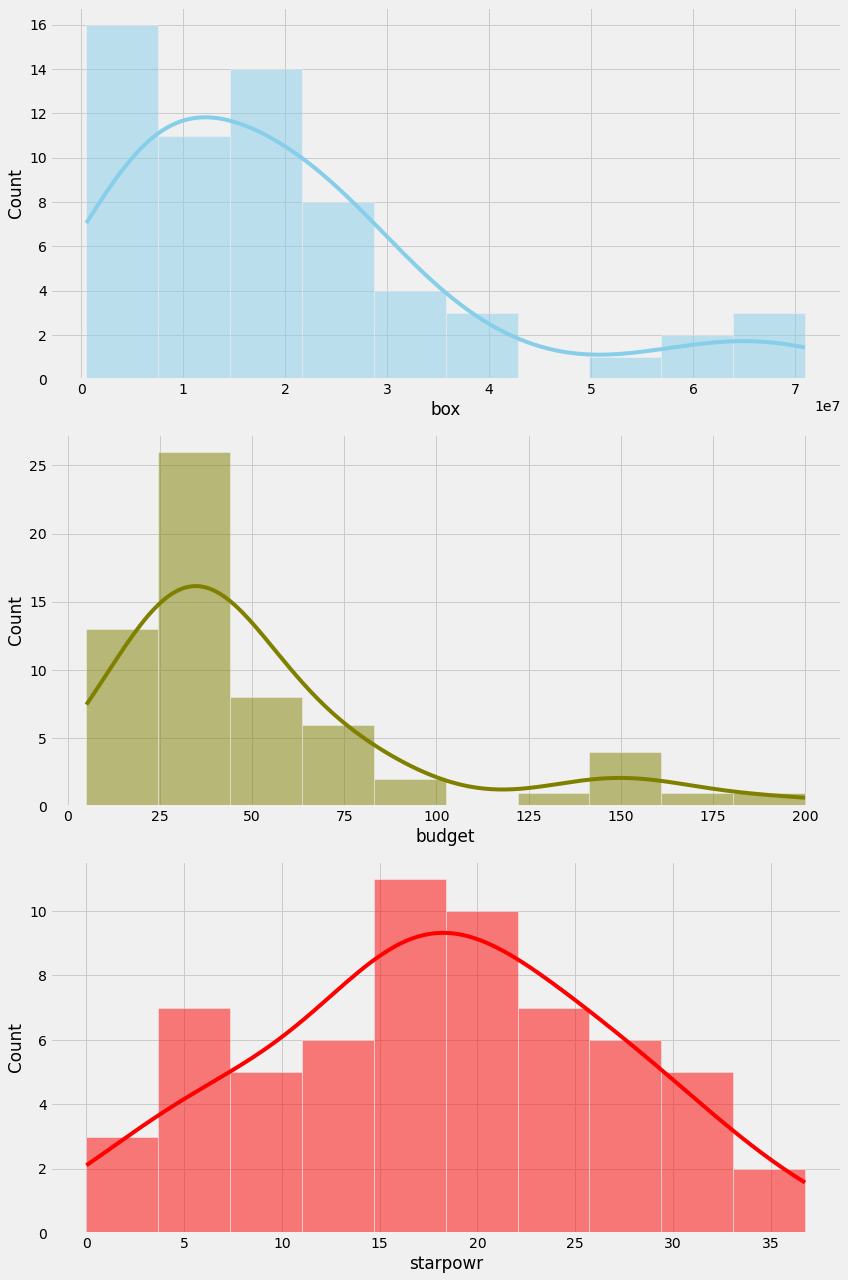

In [93]:
# Histogram of box, budget, and starpowr 

f, axs = plt.subplots(3, 1, figsize=(12, 18))

sns.histplot(data=df, x="box",kde = True, color="skyblue", bins=10, ax=axs[0])
sns.histplot(data=df, x="budget",kde = True, color="olive",bins=10, ax=axs[1])
sns.histplot(data=df, x="starpowr",kde = True, color="red",bins=10,ax=axs[2])
f.tight_layout()
plt.show()

#Data is right skewed for box and budget

In [7]:
# Applying log Transformation to budget abd box office variable
df['log_budget'] = np.log(df['budget'])
df['log_box'] = np.log(df['box'])

## Linear regression of box office revenues on the “traditional” variables

In [8]:
newdf = df

In [9]:
new_df = newdf.drop(columns =['box','budget','addict','cmngsoon','fandango','cntwait3'])

In [10]:
new_df

,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget,log_box
0,0,0,0,19.83,0,0,1,0,0,3.332205,16.768705
1,0,1,0,32.69,1,0,0,1,0,5.010635,17.960336
2,0,0,0,15.69,0,0,1,0,0,3.621671,15.502207
3,0,0,1,23.62,1,1,0,0,0,5.298317,18.028066
4,0,1,0,19.02,0,0,0,1,0,5.010635,17.082152
...,...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,34.86,0,0,0,1,0,5.164786,17.898476
58,0,0,1,4.25,0,1,0,0,0,3.091042,15.488719
59,0,0,1,5.96,0,0,0,0,1,2.815409,16.951212
60,0,0,1,16.62,1,1,0,0,0,4.442651,18.077493


In [11]:
new_df['const'] = 1.0
new_df



,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget,log_box,const
0,0,0,0,19.83,0,0,1,0,0,3.332205,16.768705,1.0
1,0,1,0,32.69,1,0,0,1,0,5.010635,17.960336,1.0
2,0,0,0,15.69,0,0,1,0,0,3.621671,15.502207,1.0
3,0,0,1,23.62,1,1,0,0,0,5.298317,18.028066,1.0
4,0,1,0,19.02,0,0,0,1,0,5.010635,17.082152,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,34.86,0,0,0,1,0,5.164786,17.898476,1.0
58,0,0,1,4.25,0,1,0,0,0,3.091042,15.488719,1.0
59,0,0,1,5.96,0,0,0,0,1,2.815409,16.951212,1.0
60,0,0,1,16.62,1,1,0,0,0,4.442651,18.077493,1.0


In [12]:
y = new_df['log_box']
y


0     16.768705
1     17.960336
2     15.502207
3     18.028066
4     17.082152
        ...    
57    17.898476
58    15.488719
59    16.951212
60    18.077493
61    15.559836
Name: log_box, Length: 62, dtype: float64

In [13]:
final_new_df = new_df.drop(columns =['log_box'])

In [14]:
final_new_df

,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget,const
0,0,0,0,19.83,0,0,1,0,0,3.332205,1.0
1,0,1,0,32.69,1,0,0,1,0,5.010635,1.0
2,0,0,0,15.69,0,0,1,0,0,3.621671,1.0
3,0,0,1,23.62,1,1,0,0,0,5.298317,1.0
4,0,1,0,19.02,0,0,0,1,0,5.010635,1.0
...,...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,34.86,0,0,0,1,0,5.164786,1.0
58,0,0,1,4.25,0,1,0,0,0,3.091042,1.0
59,0,0,1,5.96,0,0,0,0,1,2.815409,1.0
60,0,0,1,16.62,1,1,0,0,0,4.442651,1.0


In [15]:
#First linear regerssion Model on tradional variables
trad_model = sm.OLS(y, final_new_df).fit()
print(trad_model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     2.656
Date:                Sat, 10 Sep 2022   Prob (F-statistic):             0.0109
Time:                        02:50:14   Log-Likelihood:                -70.832
No. Observations:                  62   AIC:                             163.7
Df Residuals:                      51   BIC:                             187.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G              0.2524      0.692      0.365      0.7

#### At 0.10 the most significant veriables are log_budget, horror and sequel

### Linear regression using only the variables that were significant 

In [16]:
# Creating new df using only the significant variables
sig_new_df = final_new_df[['log_budget','horror', 'sequel','const']]

sig_new_df

,log_budget,horror,sequel,const
0,3.332205,0,0,1.0
1,5.010635,0,1,1.0
2,3.621671,0,0,1.0
3,5.298317,0,1,1.0
4,5.010635,0,0,1.0
...,...,...,...,...
57,5.164786,0,0,1.0
58,3.091042,0,0,1.0
59,2.815409,1,0,1.0
60,4.442651,0,1,1.0


In [17]:
#Second linear model with significant variables
sig_model = sm.OLS(y, sig_new_df).fit()
print(sig_model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     7.929
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           0.000162
Time:                        02:50:14   Log-Likelihood:                -73.175
No. Observations:                  62   AIC:                             154.4
Df Residuals:                      58   BIC:                             162.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_budget     0.6568      0.159      4.124      0.0

- The R-squared is 0.291.
- The adjusted R-squared has increased, and the R-squared has decreased for the model using only significant variables as compared to the model using all traditional variables except buzz variables.
- The increase in adjusted R-squared signifies that the model has improved when only significant variables were used.
- Also, all the variables are still significant at the 0.10 level.


### Histograms of the four “buzz” variables.

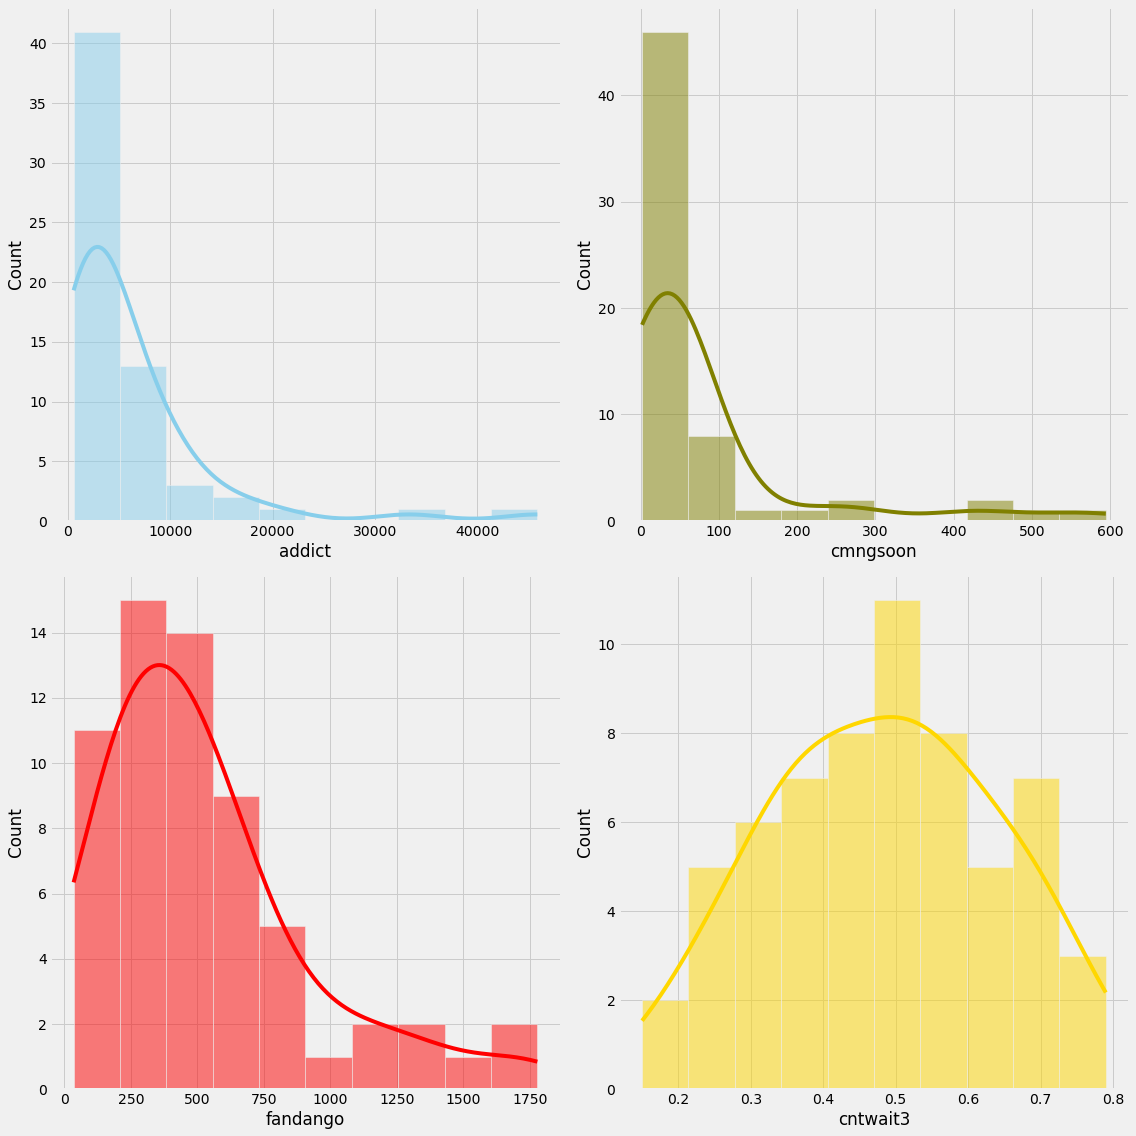

In [94]:
# Histogram of buzz variables 

f, axs = plt.subplots(2, 2, figsize=(16, 16))

sns.histplot(data=df, x="addict", kde = True, color="skyblue",bins=10, ax=axs[0,0])
sns.histplot(data=df, x="cmngsoon",kde = True, color="olive",bins=10, ax=axs[0,1])
sns.histplot(data=df, x="fandango",kde = True, color="red",bins=10,ax=axs[1,0])
sns.histplot(data=df, x="cntwait3",kde = True, color="gold",bins=10,ax=axs[1,1])
f.tight_layout()
plt.show()



In [19]:
# Applying log transformations to the skewed variables
df['log_addict'] = np.log(df['addict'])
df['log_cmngsoon'] = np.log(df['cmngsoon'])
df['log_fandango'] = np.log(df['fandango'])

In [20]:
# Adding the transformed variables to a new dataframe

all_new_df = final_new_df

all_new_df['log_addict'] = df['log_addict']
all_new_df['log_cmgsoon'] = df['log_cmngsoon']
all_new_df['log_fandango'] = df['log_fandango']
all_new_df['cntwait3'] = df['cntwait3']


In [21]:
all_new_df

,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget,const,log_addict,log_cmgsoon,log_fandango,cntwait3
0,0,0,0,19.83,0,0,1,0,0,3.332205,1.0,8.969605,2.302585,4.969813,0.49
1,0,1,0,32.69,1,0,0,1,0,5.010635,1.0,8.654692,4.077537,6.148468,0.79
2,0,0,0,15.69,0,0,1,0,0,3.621671,1.0,6.745236,3.178054,5.288267,0.36
3,0,0,1,23.62,1,1,0,0,0,5.298317,1.0,9.637306,4.532599,7.483244,0.76
4,0,1,0,19.02,0,0,0,1,0,5.010635,1.0,8.428198,3.401197,7.011214,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,1,0,34.86,0,0,0,1,0,5.164786,1.0,9.114435,4.219508,6.472346,0.70
58,0,0,1,4.25,0,1,0,0,0,3.091042,1.0,8.066521,4.543295,3.663562,0.62
59,0,0,1,5.96,0,0,0,0,1,2.815409,1.0,9.774745,4.060443,4.804021,0.53
60,0,0,1,16.62,1,1,0,0,0,4.442651,1.0,9.269521,6.386879,6.744059,0.71


### Linear regression of box office revenues on all the independent variables

In [22]:
# Model with all the variables
all_model = sm.OLS(y, all_new_df).fit()
print(all_model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           3.77e-06
Time:                        02:50:15   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
G                0.6375      0.600      1.063   

Significant variables are PG,action,animated,cntwait3,log_addict

### Linear regression using only the variables that were significant.

In [23]:
# linear regression using only the variables that were significant.
sig_all_df = all_new_df[['PG', 'action','animated','cntwait3','log_addict','const']]

In [24]:
sig_all_df

,PG,action,animated,cntwait3,log_addict,const
0,0,0,0,0.49,8.969605,1.0
1,1,0,1,0.79,8.654692,1.0
2,0,0,0,0.36,6.745236,1.0
3,0,1,0,0.76,9.637306,1.0
4,1,0,1,0.53,8.428198,1.0
...,...,...,...,...,...,...
57,1,0,1,0.70,9.114435,1.0
58,0,1,0,0.62,8.066521,1.0
59,0,0,0,0.53,9.774745,1.0
60,0,1,0,0.71,9.269521,1.0


In [25]:
#All significant variables

sig_all_model = sm.OLS(y, sig_all_df).fit()
print(sig_all_model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     14.15
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           6.06e-09
Time:                        02:50:15   Log-Likelihood:                -58.512
No. Observations:                  62   AIC:                             129.0
Df Residuals:                      56   BIC:                             141.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PG             0.3464      0.228      1.519      0.1

 Model with Adjusted R square 51.9% is the best model yet



### Principal Component Analysis to just the 4 “buzz” variables. 

In [27]:
pca_df = all_new_df[['log_addict','log_cmgsoon','log_fandango','cntwait3']]
pca_df



,log_addict,log_cmgsoon,log_fandango,cntwait3
0,8.969605,2.302585,4.969813,0.49
1,8.654692,4.077537,6.148468,0.79
2,6.745236,3.178054,5.288267,0.36
3,9.637306,4.532599,7.483244,0.76
4,8.428198,3.401197,7.011214,0.53
...,...,...,...,...
57,9.114435,4.219508,6.472346,0.70
58,8.066521,4.543295,3.663562,0.62
59,9.774745,4.060443,4.804021,0.53
60,9.269521,6.386879,6.744059,0.71


In [28]:
sc = prep.StandardScaler()
pca_df_sc = pd.DataFrame(sc.fit_transform(pca_df), columns = pca_df.columns)

# StandardScaler uses the population variance/standard deviation
# calculate the sample standard deviation of the result and scale by dividing with it 

sc.scale = np.std(pca_df_sc, axis=0, ddof=1).to_list()

#print(sc.scale_)
pca_df_sc = pca_df_sc/sc.scale

In [29]:
pca_df_sc

,log_addict,log_cmgsoon,log_fandango,cntwait3
0,0.803754,-1.090305,-1.141892,0.048398
1,0.487415,0.393889,0.220592,1.963723
2,-1.430683,-0.358249,-0.773771,-0.781576
3,1.474477,0.774406,1.763547,1.772190
4,0.259896,-0.171659,1.217896,0.303775
...,...,...,...,...
57,0.949239,0.512603,0.594984,1.389125
58,-0.103418,0.783350,-2.651873,0.878372
59,1.612538,0.379595,-1.333542,0.303775
60,1.105027,2.324933,0.909074,1.452970


In [30]:
# create pca object not specifying the number of components results in all variables being used

pcaBuzz= PCA()

# pass the feature set 
# fit calculates parameters; transform applies the transformation

pcaBuzz4 = pcaBuzz.fit_transform(pca_df_sc)

In [31]:
# get Eigen values

print('\nEigen Values of Correlation Matrix')
print(pcaBuzz.explained_variance_)


Eigen Values of Correlation Matrix
[2.41420026 0.77519959 0.45214886 0.3584513 ]


In [32]:
# getting the proportion of variance explained by each PC
expldvarpcaBuzz4 = pcaBuzz.explained_variance_ratio_
expldvarpcaBuzz4

array([0.60355006, 0.1937999 , 0.11303721, 0.08961282])

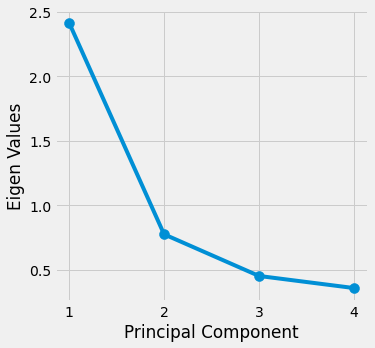

In [33]:
# scree plot

# scree plot (Eigen Values against sorted PCs)

plt.figure(figsize=(5, 5))
plt.xlabel("Principal Component")
plt.ylabel("Eigen Values")
plt.xticks(np.arange(1, 5)) 
plt.plot(np.arange(1,5), pcaBuzz.explained_variance_)
plt.scatter(np.arange(1,5), pcaBuzz.explained_variance_, s = 100)
plt.savefig(r'figures\Scree-PCA.png', transparent = "true")



In [34]:
# cumulative sum of explained variance

expldvarsum4 = np.cumsum(expldvarpcaBuzz4)
print('\nCumulative sum of the explained variance')
print(expldvarsum4)


Cumulative sum of the explained variance
[0.60355006 0.79734996 0.91038718 1.        ]


As per Kaiser's rule pca1 explains 60.35%, pca1 and pca2 together explain 79.73% and pca1 pca2 and pca3 explain 91.038

### Linear regression using all the “traditional” independent variables and all 4 principal components

In [36]:
# Linear regression using all the “traditional” independent variables all 4 principal components

pcaBuzz4

# create a dataframe with transformed components

pcaBuzz4df = pd.DataFrame(pcaBuzz4, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
print(pcaBuzz4df)



         PC1       PC2       PC3       PC4
0  -0.591216  1.120419 -0.739575  0.994585
1   1.615992  0.286131  0.763648  1.010510
2  -1.644376  0.055875  0.700252 -0.432820
3   2.806445 -0.742427 -0.229837  0.737825
4   0.662450 -1.017549 -0.274396  0.350745
..       ...       ...       ...       ...
57  1.745896  0.049794  0.073061  0.625717
58 -0.144094  2.643883  1.190069 -0.034036
59  0.695724  1.874180 -0.769292  0.163062
60  2.973264  0.158961  0.468080 -0.692292
61 -0.003581  0.489791 -0.728942  0.402951

[62 rows x 4 columns]


In [37]:
final_new_df = new_df.drop(columns =['log_box'])

pca_new_df = pd.concat([pcaBuzz4df,final_new_df], axis = 1)

In [38]:
pca_new_df

,PC1,PC2,PC3,PC4,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget,const
0,-0.591216,1.120419,-0.739575,0.994585,0,0,0,19.83,0,0,1,0,0,3.332205,1.0
1,1.615992,0.286131,0.763648,1.010510,0,1,0,32.69,1,0,0,1,0,5.010635,1.0
2,-1.644376,0.055875,0.700252,-0.432820,0,0,0,15.69,0,0,1,0,0,3.621671,1.0
3,2.806445,-0.742427,-0.229837,0.737825,0,0,1,23.62,1,1,0,0,0,5.298317,1.0
4,0.662450,-1.017549,-0.274396,0.350745,0,1,0,19.02,0,0,0,1,0,5.010635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.745896,0.049794,0.073061,0.625717,0,1,0,34.86,0,0,0,1,0,5.164786,1.0
58,-0.144094,2.643883,1.190069,-0.034036,0,0,1,4.25,0,1,0,0,0,3.091042,1.0
59,0.695724,1.874180,-0.769292,0.163062,0,0,1,5.96,0,0,0,0,1,2.815409,1.0
60,2.973264,0.158961,0.468080,-0.692292,0,0,1,16.62,1,1,0,0,0,4.442651,1.0


In [39]:
#All significant variables

pca_new_model = sm.OLS(y, pca_new_df).fit()
print(pca_new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           3.77e-06
Time:                        02:50:15   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1            0.4183      0.079      5.279      0.0

Rsquared has improved but the adjusted R squared has reduced, meaning that principal components are not making the model better, infact they(PC) are not capturing the trend in the target variable

In [4]:
# Comparing all the regression models involving the principal components 

# Model with 60% variance explained by PC

pca_60_df = pd.concat([pcaBuzz4df[['PC1']],final_new_df], axis = 1)

NameError: name 'pd' is not defined

In [42]:
pca_60_df

,PC1,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget,const
0,-0.591216,0,0,0,19.83,0,0,1,0,0,3.332205,1.0
1,1.615992,0,1,0,32.69,1,0,0,1,0,5.010635,1.0
2,-1.644376,0,0,0,15.69,0,0,1,0,0,3.621671,1.0
3,2.806445,0,0,1,23.62,1,1,0,0,0,5.298317,1.0
4,0.662450,0,1,0,19.02,0,0,0,1,0,5.010635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.745896,0,1,0,34.86,0,0,0,1,0,5.164786,1.0
58,-0.144094,0,0,1,4.25,0,1,0,0,0,3.091042,1.0
59,0.695724,0,0,1,5.96,0,0,0,0,1,2.815409,1.0
60,2.973264,0,0,1,16.62,1,1,0,0,0,4.442651,1.0


In [43]:
# Model 60% pca_60_model

pca_60_model = sm.OLS(y, pca_60_df).fit()
print(pca_60_model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     6.510
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           1.39e-06
Time:                        02:50:15   Log-Likelihood:                -56.278
No. Observations:                  62   AIC:                             136.6
Df Residuals:                      50   BIC:                             162.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1            0.4291      0.078      5.473      0.0

In [44]:
# Model with 70% variance explained by PC


pca_70_df = pd.concat([pcaBuzz4df[['PC1','PC2']],final_new_df], axis = 1)
pca_70_df

,PC1,PC2,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget,const
0,-0.591216,1.120419,0,0,0,19.83,0,0,1,0,0,3.332205,1.0
1,1.615992,0.286131,0,1,0,32.69,1,0,0,1,0,5.010635,1.0
2,-1.644376,0.055875,0,0,0,15.69,0,0,1,0,0,3.621671,1.0
3,2.806445,-0.742427,0,0,1,23.62,1,1,0,0,0,5.298317,1.0
4,0.662450,-1.017549,0,1,0,19.02,0,0,0,1,0,5.010635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.745896,0.049794,0,1,0,34.86,0,0,0,1,0,5.164786,1.0
58,-0.144094,2.643883,0,0,1,4.25,0,1,0,0,0,3.091042,1.0
59,0.695724,1.874180,0,0,1,5.96,0,0,0,0,1,2.815409,1.0
60,2.973264,0.158961,0,0,1,16.62,1,1,0,0,0,4.442651,1.0


In [45]:
# Model 70% pca_70_model

pca_70_model = sm.OLS(y, pca_70_df).fit()
print(pca_70_model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     6.357
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           1.27e-06
Time:                        02:50:15   Log-Likelihood:                -54.729
No. Observations:                  62   AIC:                             135.5
Df Residuals:                      49   BIC:                             163.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1            0.4219      0.077      5.454      0.0

In [46]:
# Model with 80%/90% variance explained by PC


pca_80_df = pd.concat([pcaBuzz4df[['PC1','PC2','PC3']],final_new_df], axis = 1)
pca_80_df

,PC1,PC2,PC3,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,log_budget,const
0,-0.591216,1.120419,-0.739575,0,0,0,19.83,0,0,1,0,0,3.332205,1.0
1,1.615992,0.286131,0.763648,0,1,0,32.69,1,0,0,1,0,5.010635,1.0
2,-1.644376,0.055875,0.700252,0,0,0,15.69,0,0,1,0,0,3.621671,1.0
3,2.806445,-0.742427,-0.229837,0,0,1,23.62,1,1,0,0,0,5.298317,1.0
4,0.662450,-1.017549,-0.274396,0,1,0,19.02,0,0,0,1,0,5.010635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.745896,0.049794,0.073061,0,1,0,34.86,0,0,0,1,0,5.164786,1.0
58,-0.144094,2.643883,1.190069,0,0,1,4.25,0,1,0,0,0,3.091042,1.0
59,0.695724,1.874180,-0.769292,0,0,1,5.96,0,0,0,0,1,2.815409,1.0
60,2.973264,0.158961,0.468080,0,0,1,16.62,1,1,0,0,0,4.442651,1.0


In [47]:
# Model 80%/90%

pca_80_model = sm.OLS(y, pca_80_df).fit()
print(pca_80_model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     5.752
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           3.32e-06
Time:                        02:50:15   Log-Likelihood:                -54.715
No. Observations:                  62   AIC:                             137.4
Df Residuals:                      48   BIC:                             167.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1            0.4243      0.080      5.313      0.0

Model with two PC component with 79% cumnulative variation is the best model anomgst all PC models we have craeted

### Principal Component Analysis to the 4 “buzz” variables and the other continuous variables

In [49]:
# Principal Component Analysis to the 4 “buzz” variables and the other continuous variables

pca6_df = all_new_df[['log_addict','log_cmgsoon','log_fandango','cntwait3','log_budget','starpowr']]
pca6_df


,log_addict,log_cmgsoon,log_fandango,cntwait3,log_budget,starpowr
0,8.969605,2.302585,4.969813,0.49,3.332205,19.83
1,8.654692,4.077537,6.148468,0.79,5.010635,32.69
2,6.745236,3.178054,5.288267,0.36,3.621671,15.69
3,9.637306,4.532599,7.483244,0.76,5.298317,23.62
4,8.428198,3.401197,7.011214,0.53,5.010635,19.02
...,...,...,...,...,...,...
57,9.114435,4.219508,6.472346,0.70,5.164786,34.86
58,8.066521,4.543295,3.663562,0.62,3.091042,4.25
59,9.774745,4.060443,4.804021,0.53,2.815409,5.96
60,9.269521,6.386879,6.744059,0.71,4.442651,16.62


In [50]:
sc = prep.StandardScaler()
pca6_df_sc = pd.DataFrame(sc.fit_transform(pca6_df), columns = pca6_df.columns)

# StandardScaler uses the population variance/standard deviation
# calculate the sample standard deviation of the result and scale by dividing with it 

sc.scale = np.std(pca6_df_sc, axis=0, ddof=1).to_list()

#print(sc.scale_)
pca6_df_sc = pca6_df_sc/sc.scale

In [51]:
# create pca object
# not specifying the number of components results in all variables being used

pca6 = PCA()

#pass the feature set 
# fit calculates parameters; transform applies the transformation

pca6_all = pca6.fit_transform(pca6_df_sc)

In [52]:
#get Eigen values

print('\nEigen Values of Correlation Matrix')
print(pca6.explained_variance_)

#getting the proportion of variance explained by each PC
expldvarpca6 = pca6.explained_variance_ratio_
expldvarpca6

# cumulative sum of explained variance

expldvarsum6 = np.cumsum(expldvarpca6)
print('\nCumulative sum of the explained variance')
print(expldvarsum6)



Eigen Values of Correlation Matrix
[2.83823382 1.45442671 0.70232212 0.44299297 0.34049709 0.2215273 ]

Cumulative sum of the explained variance
[0.47303897 0.71544342 0.83249711 0.90632927 0.96307878 1.        ]


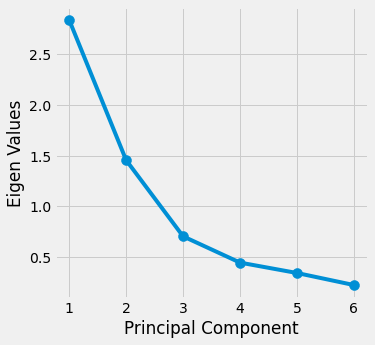

In [53]:
# scree plot

# scree plot (Eigen Values against sorted PCs)

plt.figure(figsize=(5, 5))
plt.xlabel("Principal Component")
plt.ylabel("Eigen Values")
plt.xticks(np.arange(1, 7)) 
plt.plot(np.arange(1,7), pca6.explained_variance_)
plt.scatter(np.arange(1,7), pca6.explained_variance_, s = 100)
plt.savefig(r'figures\Scree-PCA.png', transparent = "true")



In [54]:
# 60%/70% variance is explained by PCA1 and PCA2 together, 80% by PCA1,PCA2,PCA3, 90% by PCA1,PCA2,PCA3,PCA4

In [55]:
# create a dataframe with transformed components

pca_12_6 = pd.DataFrame(pca6_all, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6'])
print(pca_12_6)



         PC1       PC2       PC3       PC4       PC5       PC6
0   0.727800  0.038162  1.204158  1.123466 -0.117357 -0.448392
1  -2.637946 -1.370233  1.077239 -0.251879  0.013417 -0.366720
2   1.542932 -0.469245  0.076520 -0.857879  0.278870  0.224304
3  -3.605130 -0.458782 -0.388755  0.345631  0.690654 -0.445240
4  -1.453419 -0.892621 -0.777003  0.150703  1.127304 -0.218117
..       ...       ...       ...       ...       ...       ...
57 -2.870020 -1.454298  0.723402  0.275331  0.139703  0.201002
58  1.015619  2.049672  2.170410 -1.181606  0.225858 -0.428071
59  0.412522  2.404608  1.172586  0.762127 -0.042936 -0.285026
60 -2.919339  1.181531 -0.091520 -0.711417  0.114676  0.378143
61  0.933144  1.094761  0.242295  1.012984 -1.199726 -0.388103

[62 rows x 6 columns]


In [56]:
# Question 12

final_new_df = final_new_df[['G','PG','PG13','sequel','action','comedy','animated','horror','const']]
final_new_df

# Model with 60% variance explained by PC


pca_60_12df = pd.concat([pca_12_6[['PC1','PC2']],final_new_df], axis = 1)

In [57]:
pca_60_12df

,PC1,PC2,G,PG,PG13,sequel,action,comedy,animated,horror,const
0,0.727800,0.038162,0,0,0,0,0,1,0,0,1.0
1,-2.637946,-1.370233,0,1,0,1,0,0,1,0,1.0
2,1.542932,-0.469245,0,0,0,0,0,1,0,0,1.0
3,-3.605130,-0.458782,0,0,1,1,1,0,0,0,1.0
4,-1.453419,-0.892621,0,1,0,0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
57,-2.870020,-1.454298,0,1,0,0,0,0,1,0,1.0
58,1.015619,2.049672,0,0,1,0,1,0,0,0,1.0
59,0.412522,2.404608,0,0,1,0,0,0,0,1,1.0
60,-2.919339,1.181531,0,0,1,1,1,0,0,0,1.0


In [58]:
# Model 60%

pca_60_12model = sm.OLS(y, pca_60_12df).fit()
print(pca_60_12model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7.327
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           4.70e-07
Time:                        02:50:16   Log-Likelihood:                -56.220
No. Observations:                  62   AIC:                             134.4
Df Residuals:                      51   BIC:                             157.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.4596      0.061     -7.586      0.0

In [59]:
# Model with 80% variance explained by PC

pca_80_12df = pd.concat([pca_12_6[['PC1','PC2','PC3']],final_new_df], axis = 1)

In [60]:
# Model 80%

pca_80_12model = sm.OLS(y, pca_80_12df).fit()
print(pca_80_12model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     7.198
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           3.64e-07
Time:                        02:50:16   Log-Likelihood:                -54.407
No. Observations:                  62   AIC:                             132.8
Df Residuals:                      50   BIC:                             158.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.4542      0.060     -7.632      0.0

In [61]:
# Model with 90% variance explained by PC

pca_90_12df = pd.concat([pca_12_6[['PC1','PC2','PC3','PC4']],final_new_df], axis = 1)

In [62]:
# Model 90%

pca_90_12model = sm.OLS(y, pca_90_12df).fit()
print(pca_90_12model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     6.491
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           9.69e-07
Time:                        02:50:16   Log-Likelihood:                -54.333
No. Observations:                  62   AIC:                             134.7
Df Residuals:                      49   BIC:                             162.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.4480      0.063     -7.141      0.0

In [63]:
pca_12_6['const'] = 1
pca_12_6

,PC1,PC2,PC3,PC4,PC5,PC6,const
0,0.727800,0.038162,1.204158,1.123466,-0.117357,-0.448392,1
1,-2.637946,-1.370233,1.077239,-0.251879,0.013417,-0.366720,1
2,1.542932,-0.469245,0.076520,-0.857879,0.278870,0.224304,1
3,-3.605130,-0.458782,-0.388755,0.345631,0.690654,-0.445240,1
4,-1.453419,-0.892621,-0.777003,0.150703,1.127304,-0.218117,1
...,...,...,...,...,...,...,...
57,-2.870020,-1.454298,0.723402,0.275331,0.139703,0.201002,1
58,1.015619,2.049672,2.170410,-1.181606,0.225858,-0.428071,1
59,0.412522,2.404608,1.172586,0.762127,-0.042936,-0.285026,1
60,-2.919339,1.181531,-0.091520,-0.711417,0.114676,0.378143,1


In [64]:
#Model only with PCA 6

pca_model = sm.OLS(y, pca_12_6).fit()
print(pca_model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     8.291
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           2.07e-06
Time:                        02:50:16   Log-Likelihood:                -63.859
No. Observations:                  62   AIC:                             141.7
Df Residuals:                      55   BIC:                             156.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.3632      0.055     -6.641      0.0

In [85]:
 # Model with trial with significant variables

pca_trial_12df = pd.concat([pca_12_6[['PC1','PC2', 'PC3',]],final_new_df[['PG','action','animated','const']]], axis = 1)

In [86]:
# Model 90%

pca_trial_12model = sm.OLS(y, pca_trial_12df).fit()
print(pca_trial_12model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_box   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     12.58
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           7.16e-09
Time:                        11:55:49   Log-Likelihood:                -57.054
No. Observations:                  62   AIC:                             128.1
Df Residuals:                      55   BIC:                             143.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.4765      0.057     -8.341      0.0

- By comparing the linear regressions without "buzz" variables (linear regression 1 and 2) to the linear regressions with "buzz" variables (linear regression 3 and 4), it can be observed that the inclusion of "buzz" variables significantly improves the model. The addition of these variables leads to an increase in both the R-squared and adjusted R-squared values by approximately 0.2 - 0.3.

- Similarly, when comparing the linear regressions without "buzz" variables (linear regression 1 and 2) to the linear regressions with principal components based on "buzz" variables (linear regression 5, 6, 7, and 8), it becomes evident that employing PCA also contributes to building a better model. The introduction of PCA results in an increase in both the R-squared and adjusted R-squared values by approximately 0.2 - 0.3.

- In summary, the inclusion of "buzz" variables and the utilization of PCA greatly enhance the quality of the models.
